In [4]:
# import 'Numpy'
import numpy as np

# import 'Pandas' 
import pandas as pd

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import color package from matplotlib
from matplotlib.colors import ListedColormap

# import 'Seaborn'
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# import regular expression
import re

# import ast
import ast

# display all columns of the dataframe
pd.options.display.max_columns = None

# import label encoder , ordinal encoder , onehot encoder 
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

# import stats for performing statistical tests
import scipy.stats as stats

# import train-test split
from sklearn.model_selection import train_test_split

# import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# import SMOTE to create synthetic data
from imblearn.over_sampling import SMOTE

# import various functions from sklearn
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix,f1_score
from sklearn.model_selection import KFold,GridSearchCV

# import Linear Regression
from sklearn.linear_model import LinearRegression

# import statsmodels
import statsmodels.api as sma

# import Logistic Regression
from sklearn.linear_model import LogisticRegression

# import DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier

# import tree to visualize DecisiontTree
from sklearn import tree

# import RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

# import AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

# import GradientBoosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# import XtremeGradientBoost Classifier
from xgboost import XGBClassifier

# import wordlcoud, stopwords
from wordcloud import WordCloud,STOPWORDS


C:\Users\Praveen\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [55]:
df=pd.read_csv('heart.csv')
df.head(20)
df1=df.copy()

In [7]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')
print(f'Dimension of the dataset is {df.ndim}')

The dataset has 303 rows and 14 columns
Dimension of the dataset is 2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Note: From the data types we see that all features are int64/float64. But that is because some of the categorical features including the target (has disease/no disease) are already label encoded for us. We will, in the section below, see a detailed decreption of the features.

In [12]:
missing_values = pd.DataFrame({'No of missing values': df.isnull().sum(),
                              '% of missing values': (df.isnull().sum()/df.shape[0])*100}
                             ).reset_index().rename(columns = {'index':'Name'})

missing_values

,Name,No of missing values,% of missing values
0,age,0,0.0
1,sex,0,0.0
2,cp,0,0.0
3,trestbps,0,0.0
4,chol,0,0.0
5,fbs,0,0.0
6,restecg,0,0.0
7,thalach,0,0.0
8,exang,0,0.0
9,oldpeak,0,0.0


In [13]:
'''Data Dictionary 
age: age in years
sex: sex
1 = male
0 = female
cp: chest pain type
Value 0: typical angina
Value 1: atypical angina
Value 2: non-anginal pain
Value 3: asymptomatic
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
chol: serum cholestoral in mg/dl
fbs: (fasting blood sugar > 120 mg/dl)
1 = true;
0 = false
restecg: resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach: maximum heart rate achieved
exang: exercise induced angina
1 = yes
0 = no
oldpeak = ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
Value 0: upsloping
Value 1: flat
Value 2: downsloping
ca: number of major vessels (0-3) colored by flourosopy
thal:
0 = error (in the original dataset 0 maps to NaN's)
1 = fixed defect
2 = normal
3 = reversable defect
target (the lable):
0 = no disease,
1 = disease'''

"Data Dictionary \nage: age in years\nsex: sex\n1 = male\n0 = female\ncp: chest pain type\nValue 0: typical angina\nValue 1: atypical angina\nValue 2: non-anginal pain\nValue 3: asymptomatic\ntrestbps: resting blood pressure (in mm Hg on admission to the hospital)\nchol: serum cholestoral in mg/dl\nfbs: (fasting blood sugar > 120 mg/dl)\n1 = true;\n0 = false\nrestecg: resting electrocardiographic results\nValue 0: normal\nValue 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)\nValue 2: showing probable or definite left ventricular hypertrophy by Estes' criteria\nthalach: maximum heart rate achieved\nexang: exercise induced angina\n1 = yes\n0 = no\noldpeak = ST depression induced by exercise relative to rest\nslope: the slope of the peak exercise ST segment\nValue 0: upsloping\nValue 1: flat\nValue 2: downsloping\nca: number of major vessels (0-3) colored by flourosopy\nthal:\n0 = error (in the original dataset 0 maps to NaN's)\n1 = fixe

Note on the target label:

Diagnosis of heart disease (angiographic disease status)
Value 0: < 50% diameter narrowing
Value 1: > 50% diameter narrowing

Notes from the discussion forum of the dataset:

data #93, 159, 164, 165 and 252 have ca=4 which is incorrect. In the original Cleveland dataset they are NaNs.
data #49 and 282 have thal = 0, also incorrect. They are also NaNs in the original dataset.
Action: Drop the faulty data! (7 data entry will be dropped)

In [17]:
df[df['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [19]:
df[df['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [21]:
df = df[df['ca'] < 4] #drop the wrong ca values
df = df[df['thal'] > 0] # drop the wong thal value

In [22]:
print(f'The length of the data now is {len(df)} instead of 303!')

The length of the data now is 296 instead of 303!


Rename columns for the sake of clarity
The feature names in the dataset are abbreviated and hard to understand their meaning. A full medical/technical name is hard enough to understand for most of us let alone their short form. So to make them a little bit easier to read we will, here under, change the column names of the data frame using information from the UCL data repository.
We'll also replace the coded categories (0, 1, 2,..) to their medical meaning ('atypical angina', 'typical angina', etc. for example)

In [23]:
df = df.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
    errors="raise")

In [24]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['chest_pain_type'][df['chest_pain_type'] == 0] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'asymptomatic'

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

df['resting_electrocardiogram'][df['resting_electrocardiogram'] == 0] = 'normal'
df['resting_electrocardiogram'][df['resting_electrocardiogram'] == 1] = 'ST-T wave abnormality'
df['resting_electrocardiogram'][df['resting_electrocardiogram'] == 2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 0] = 'upsloping'
df['st_slope'][df['st_slope'] == 1] = 'flat'
df['st_slope'][df['st_slope'] == 2] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 1] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 2] = 'normal'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'

In [26]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1


In [27]:
df.dtypes

age                            int64
sex                           object
chest_pain_type               object
resting_blood_pressure         int64
cholesterol                    int64
fasting_blood_sugar           object
resting_electrocardiogram     object
max_heart_rate_achieved        int64
exercise_induced_angina       object
st_depression                float64
st_slope                      object
num_major_vessels              int64
thalassemia                   object
target                         int64
dtype: object

In [28]:
# numerical features
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
# categorical (binary)
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']
# caterorical (multi-)
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

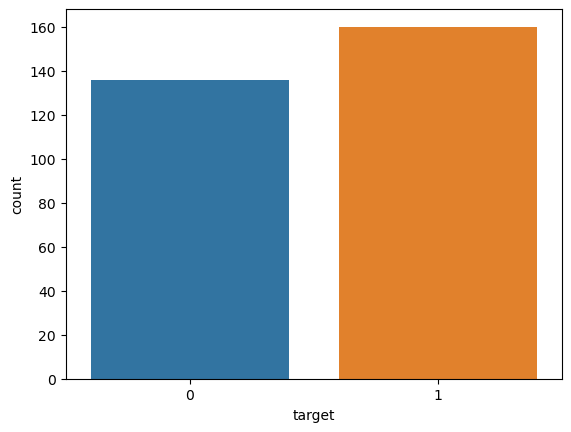

In [30]:
sns.countplot(x=df['target'])
plt.show()

#We observe that the target is fairly balanced with ~46% with no heart disease and ~54% with heart disease. So no need to worry about target imbalance.

In [31]:
df[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
cholesterol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
resting_blood_pressure,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
max_heart_rate_achieved,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
st_depression,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2
num_major_vessels,296.0,0.679054,0.939726,0.0,0.0,0.0,1.00,3.0


Age :
The average age in the dataset is 54.5 years
The oldest is 77 years, whereas the youngest is 29 years old
Cholesterol:
The average registered cholestrol level is 247.15
Maximum level is 564 and the minimum level is 126.
Note: According to a healthy cholesterol level is<200mg/dl and usually high level of cholesterol is associated with heart disease.
Resting blood pressure:
131 mean, 200 max and 94 min
Max heart rate achieved:
The abverage max heart rate registered is 149.5 bpm. The Maximum and the minumum are 202 and 71bpm respectively.
St_depression:
The average value of st_dpression is 1.06. Max is 6.2 and the minimum is 0.
Number of major blood vessels:
A maximum of 3 and a minimum of 0 major blood vessels are observed. The mean value is 0.68.

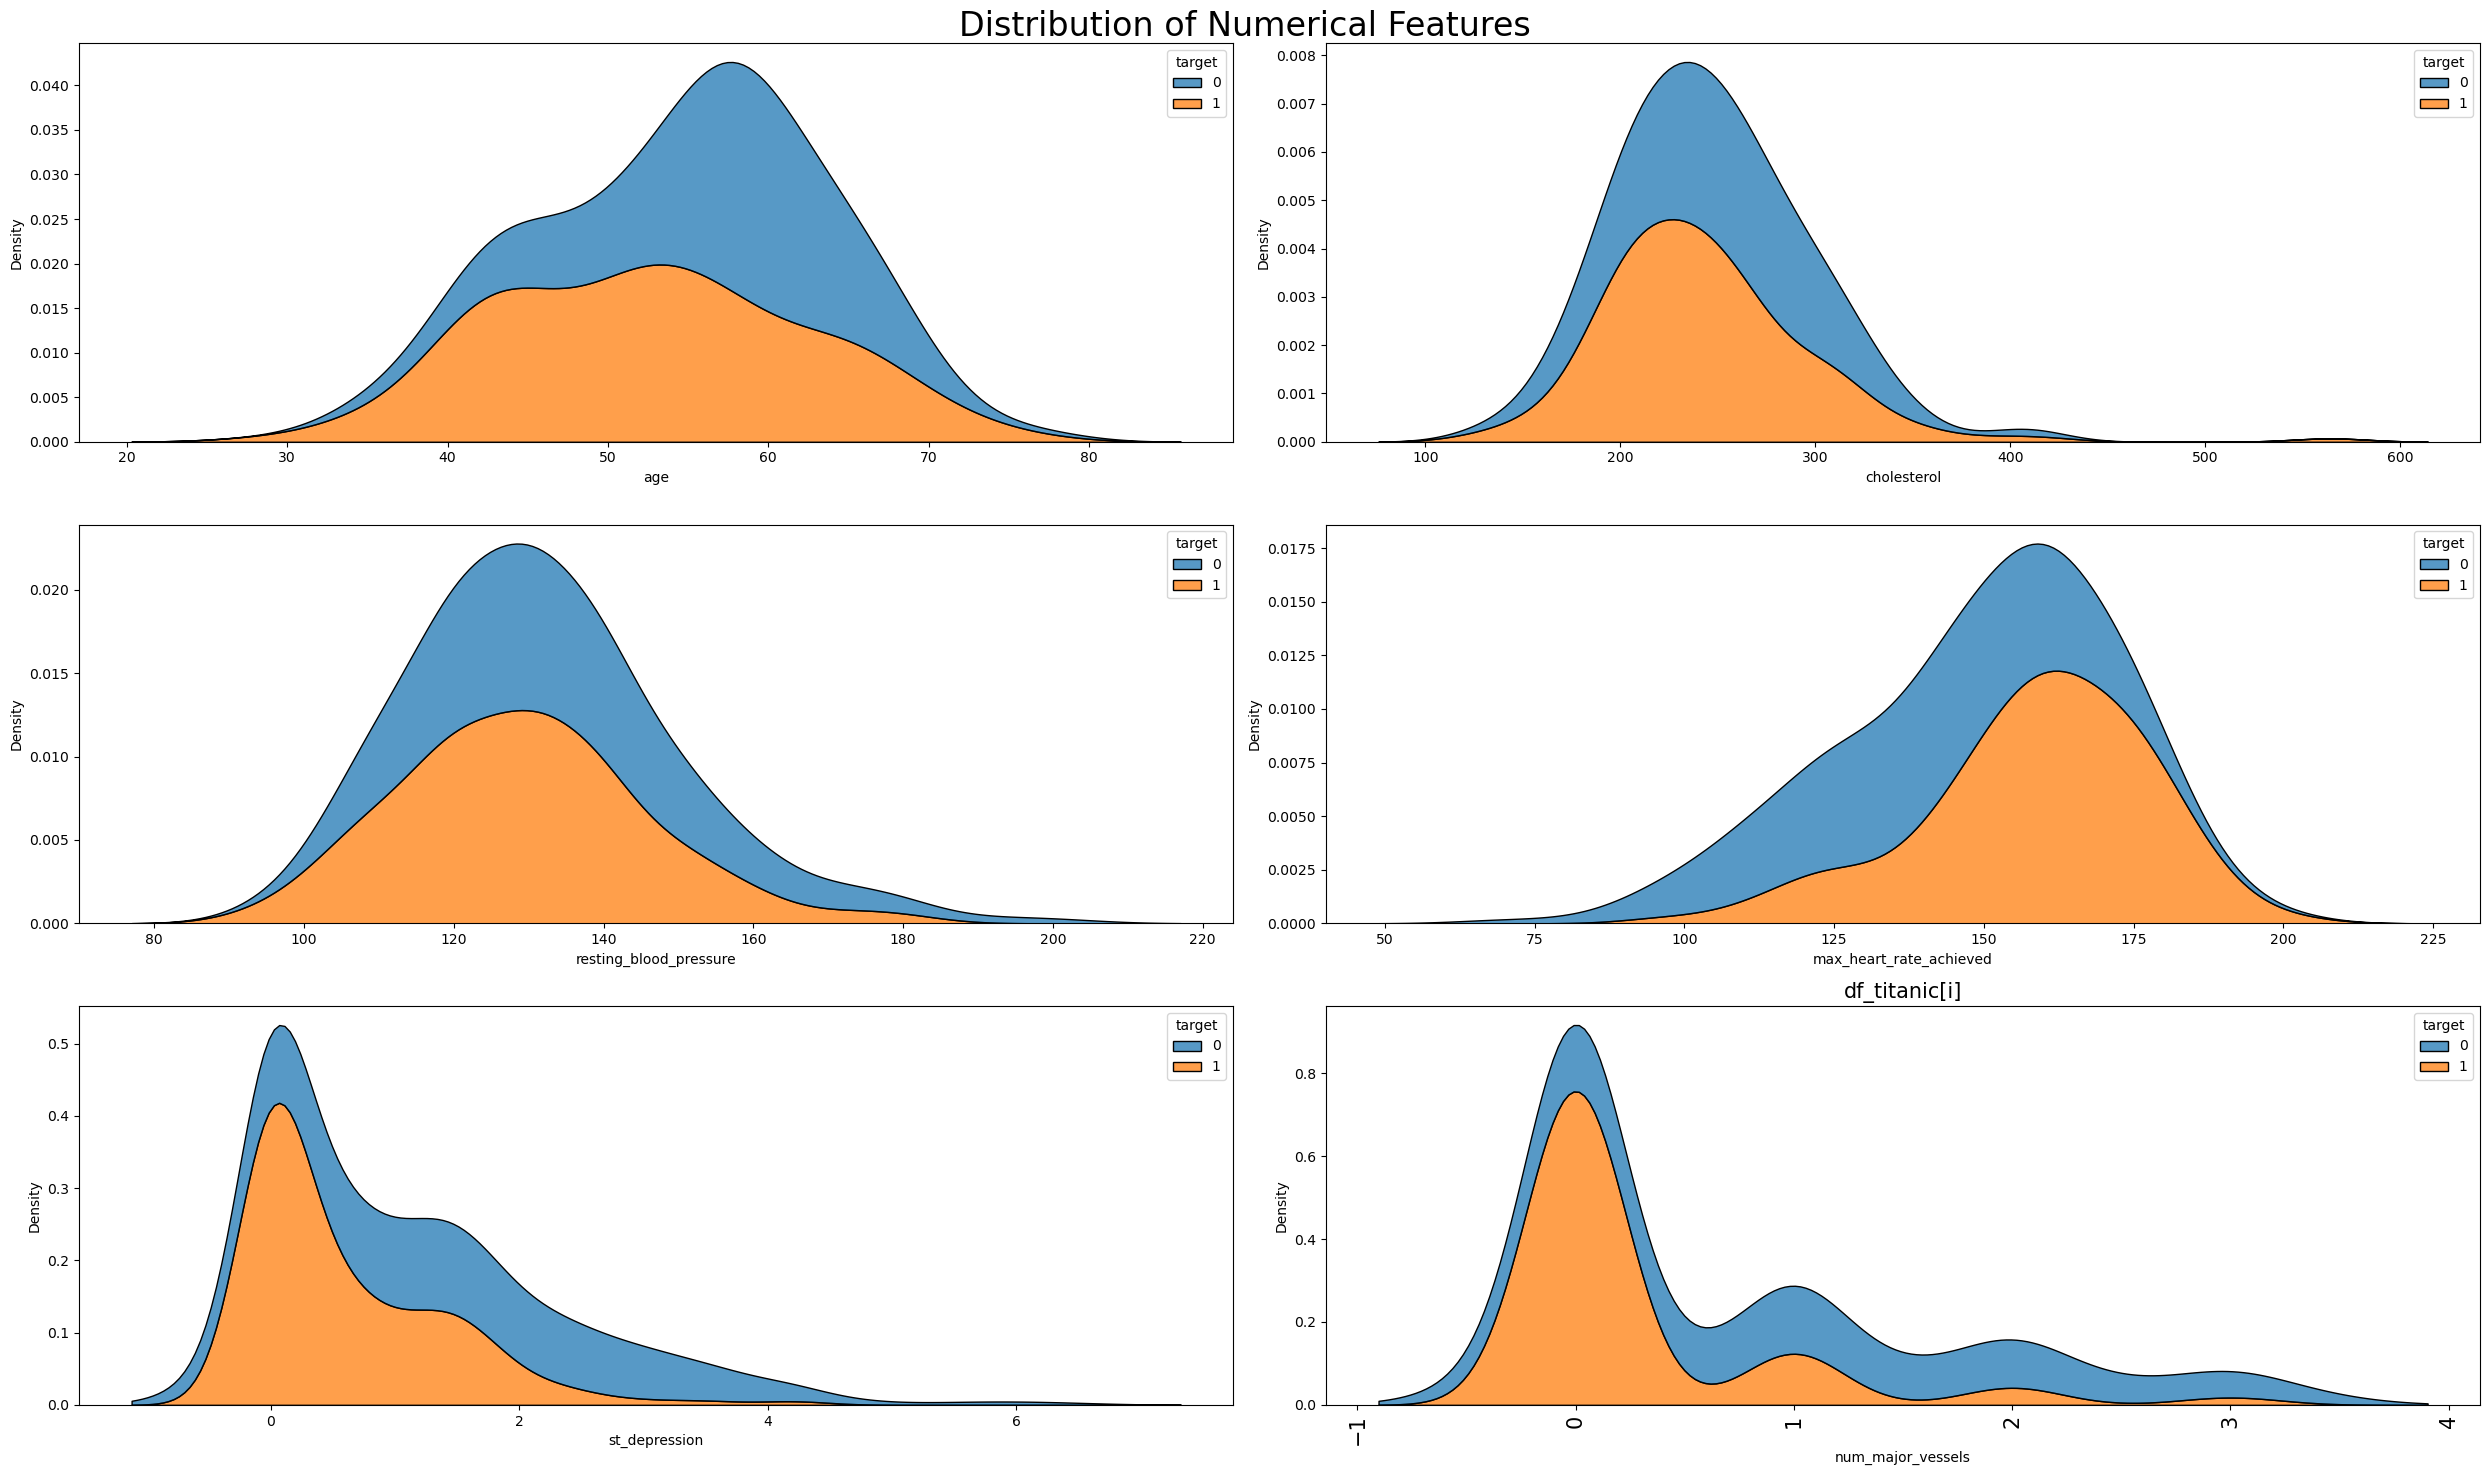

In [39]:
fig,ax=plt.subplots(3,2,figsize=(25,15))
for i ,subplot in zip(num_feats,ax.flatten()): 
    sns.kdeplot(x=df[i],hue=df['target'],multiple='stack',ax=subplot)
    plt.title('df_titanic[i]',fontsize=15)
    plt.xticks(rotation='vertical',fontsize=15)
    plt.suptitle('Distribution of Numerical Features' ,fontsize = 24)
plt.tight_layout()
plt.show()

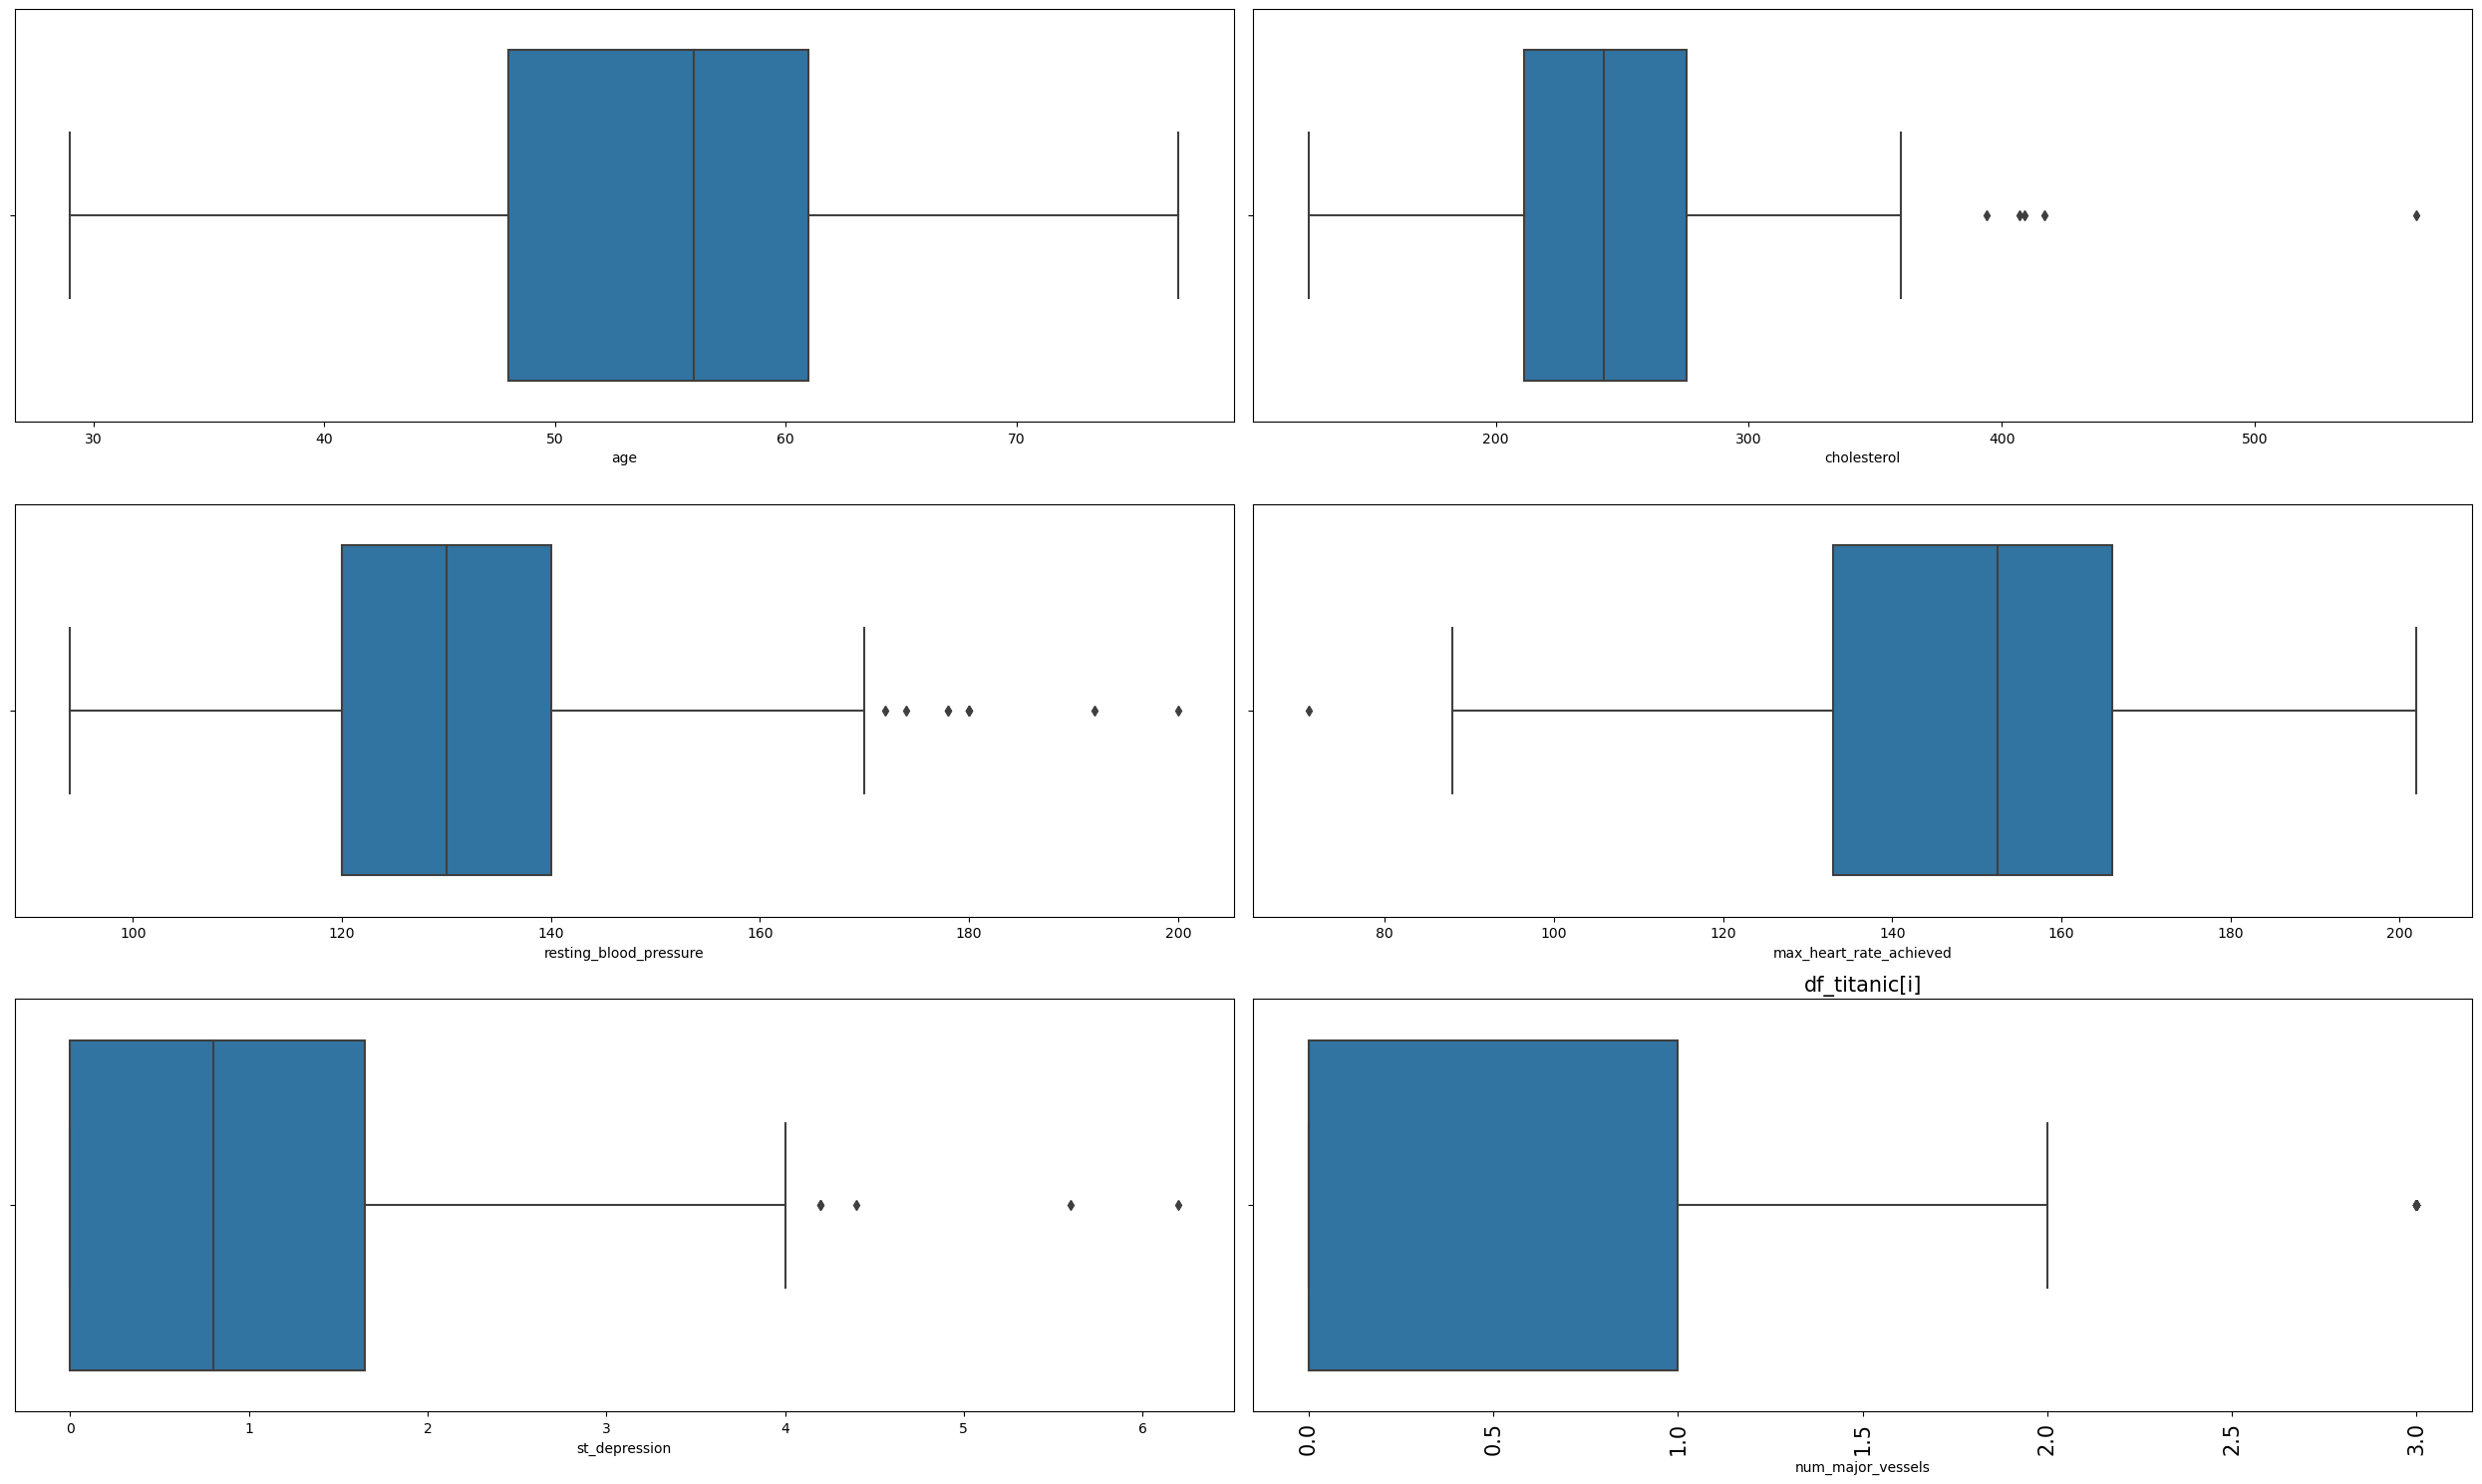

In [54]:
fig,ax=plt.subplots(3,2,figsize=(25,15))
for i ,subplot in zip(num_feats,ax.flatten()): 
    sns.boxplot(x=df[i],hue=df['target'],ax=subplot)
    plt.title('df_titanic[i]',fontsize=15)
    plt.xticks(rotation='vertical',fontsize=15)
plt.tight_layout()
plt.show()

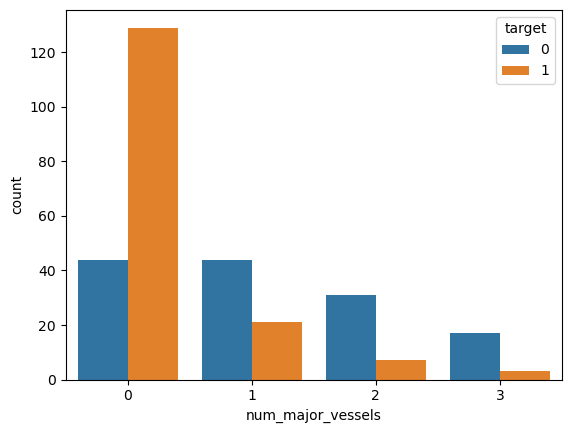

In [36]:
sns.countplot(x=df['num_major_vessels'],hue=df['target'])
plt.show()

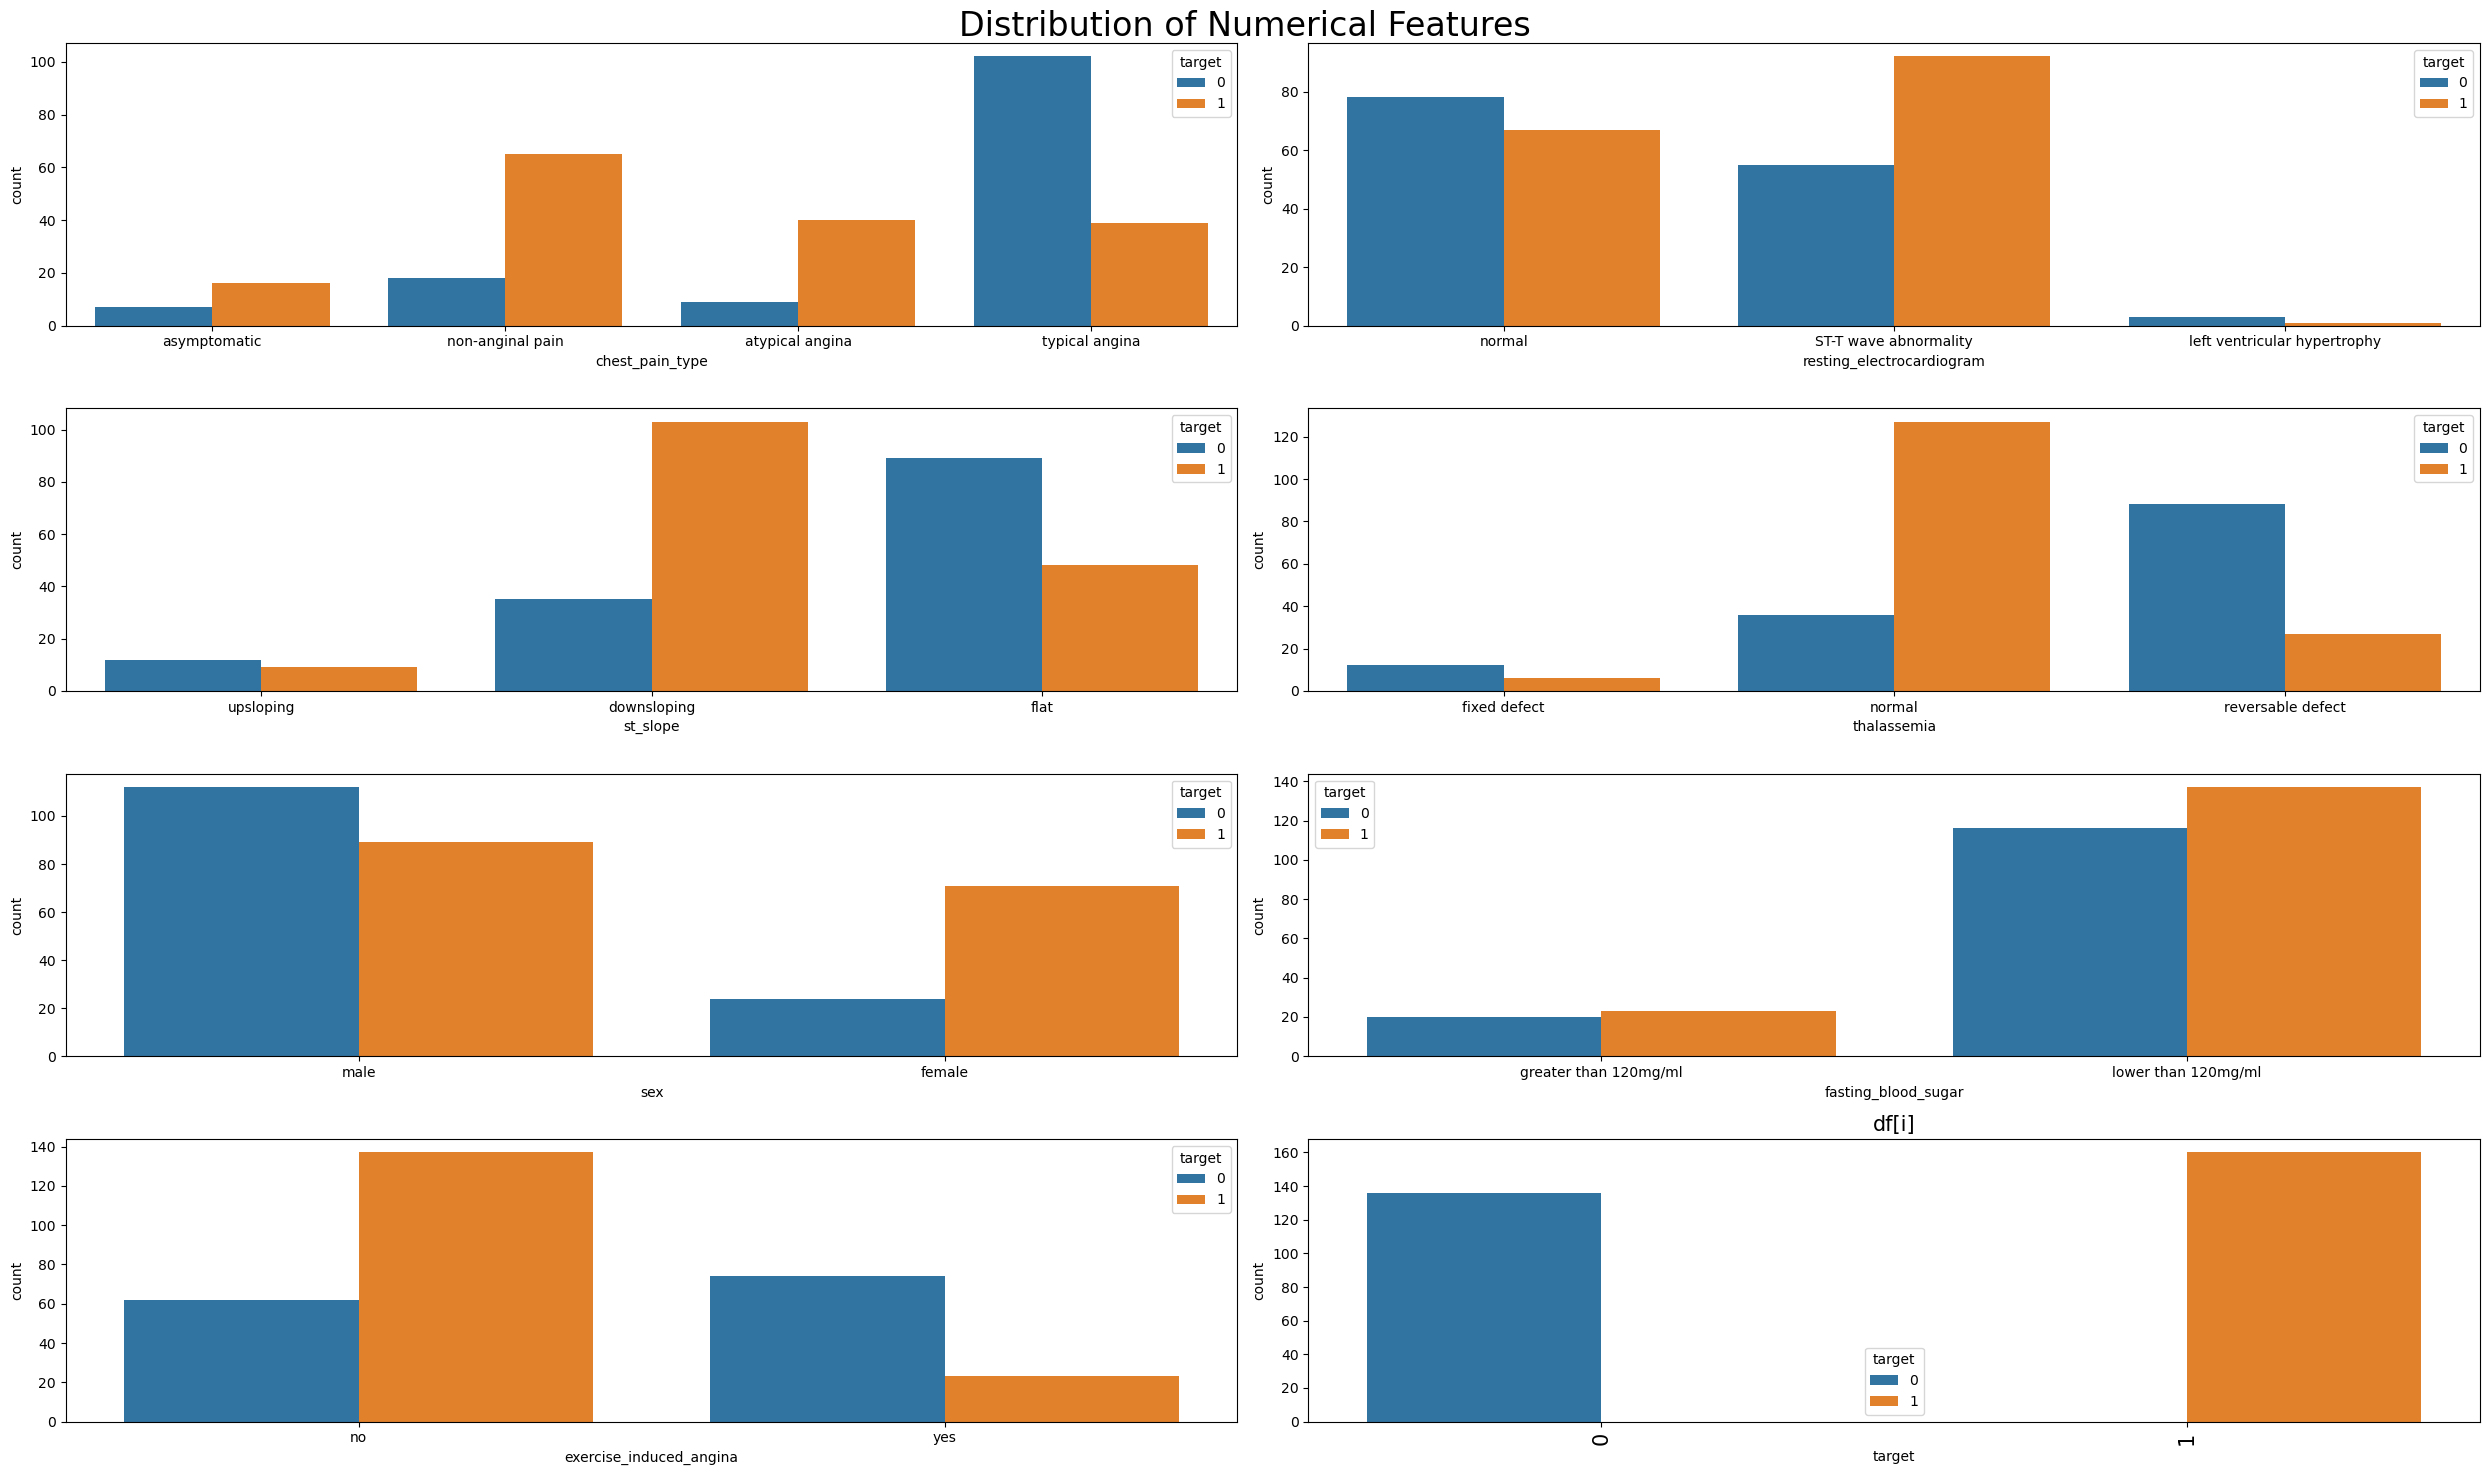

In [50]:
fig,ax=plt.subplots(4,2,figsize=(25,15))
for i ,subplot in zip(cat_feats,ax.flatten()): 
    sns.countplot(x=df[i],hue=df['target'],ax=subplot)
    plt.title('df[i]',fontsize=15)
    plt.xticks(rotation='vertical',fontsize=15)
    plt.suptitle('Distribution of Numerical Features' ,fontsize = 24)
plt.tight_layout()
plt.show()

Selected Features
Below are reg-plots of some selected features showing the linear relation with Age, similar to the first column in the pair-plot above. We observe that:

Except maximum_heart_rate_achieved, the others are positively and linearly related with age (albeit a weaker relation with st_depression).
Younger patients with higher maximum_heart_rate_achieved are more likely to have a heart condition.
Lower st_depression regardless of age is also likely an indication of a heart disease.

Categorical Features
We use a count plot to visualize the different categories with respect to the target variable. Two things we could take note of are the distribution of each category in the dataset and their contribution to the probability of correct prediction of the target variable, i.e has disease (=1) or has no disease (=0). Below is the summary of the categorical features.

Chest Pain:
More than 75% of the patients experience either typical angina or non-angina chest pain.
Patients who experienced atypical angina or non-angina chest pain are more likely to have a heart disease.
Resting Electrocardiogram:
Patients with Left ventricular hypertrophy are the fewest (~1.4%). The rest is almost a 50-50 split between patients with ST-T abnormality and those with normal REC tests.
ST-T abnormality seem to have a better correlation with the target, i.e the majority of patients with this kind of REC test ended up with a heart disease.
ST-Slope:
Most patients have a downsloping or flat ST-Slope of their REC test.
downsloping ST-Slopes are a strong indication that a patient might have a heart disease.
Thalassemia:
Most patients have a normal or reversable defect
Patients who have thalassemia defects (reversable + fixed) are less likely to have a heart disease. Whereas, those with normal thalassemia are more likely to have a heart condition. Sounds not intuitive.
Fasting blood sugar
Patients with lower (less than 120mg/ml) fasting blood sugar are the majority in our dataset consisting of ~85% of the sample.
Having lower resting blood sugar tends to increase the chances (~54%) of a heart disease.
Exercise Induced Angina
Two-third of the patients showed no exercise induced angina.
76% of the patients with exercise induced angina had no heart conditions. Whereas ~69% of the patients who did not experience exercise induced angina were diagnosed with heart condition.
Sex
More patients in the sample data are male.
Females seem to suffer from heart condition more than males.

Correlation Heatmaps 
Correlation heatmap is a useful tool to graphyically represent how two features are related to eachother. Depending upon the data types of the features, we need to use the appropriate correlation coefficient calculation methods. Examples are pearson's correlation coefficient, point biserial correlation, cramers'V correlation and etc.

Pearson's correlation
The Pearson correlation coefficient ― is a measure of linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus it is essentially a normalised measurement of the covariance, such that the result always has a value between −1 and 1.

Text(0.5, 1.05, "Numerical features correlation (Pearson's)")

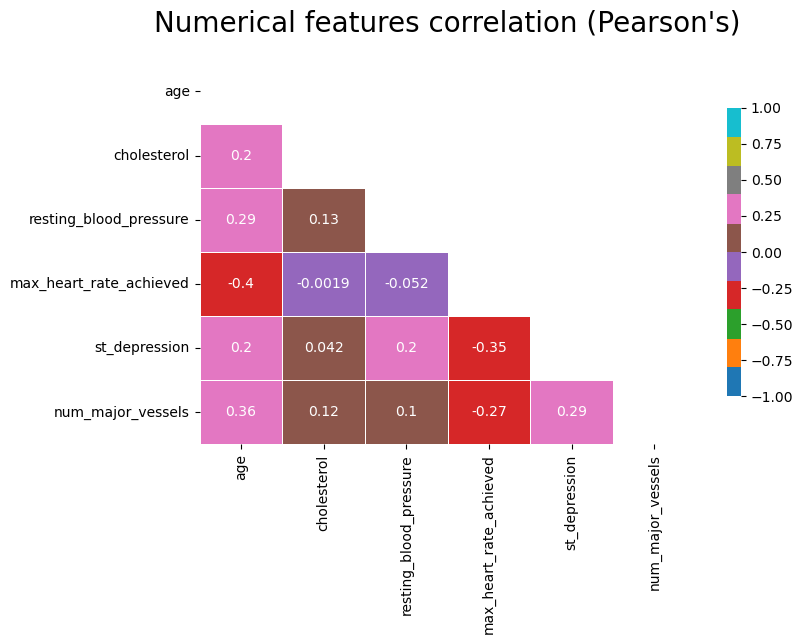

In [52]:
df_ = df[num_feats]
corr = df_.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Numerical features correlation (Pearson's)", fontsize=20, y= 1.05)

Point biserial correlation
A point-biserial correlation is used to measure the strength and direction of the association that exists between one continuous variable and one dichotomous variable. It is a special case of the Pearson’s product-moment correlation, which is applied when you have two continuous variables, whereas in this case one of the variables is measured on a dichotomous scale 

1.5 EDA Summary: 
Data size: 303 rows and 14 columns (13 independent + one target variable) > later reduced to 296 after removing faulty data points!
Data has no missing values
Features (columns) data type:
Six features are numerical
The rest (seven features) are categorical variables
Target variable is fairly balanced, 54% no-disease to 46% has-disease
Correlations:
Correlation between features is weak at best
From the numerical features num_major_vessels, max_heart_rate_achieved and st_depression are reasonabily fairly correlated with the target variable at -0.47, 0.43 and -0.43 correlation coefficient respectively.
From the categorical features chest_pain_type, num_major_vessels, thalassemia, and exercise_induced_angina are better correlated with the target variable, thalassemia being the highest at 0.52.
Cholestrol (to my surprize, but what do I know?) has less correlation with heart desease.
Takeaway: features that have higher predictive power could be, chest_pain_type, num_major_vessels, thalassemia, exercise_induced_angina max_heart_rate_achieved and st_depression. We will see which features will appear as imporatnt by the classification models.

Note : We have only 297 case (after data cleaning) which is a very small amount of data to do any serious prediction. Therefore, any conclusion made must be taken with cautions. This notebook is merely an excercise on binary classification algorithms.

In [88]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [89]:
df1 = df1[df1['ca'] < 4] 
df1 = df1[df1['thal'] > 0]

### Train Test Split

In [90]:
# Putting feature variable to X
X = df.drop(['target'],axis=1)

# Putting response variable to y
y = df['target']
    

In [91]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [92]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [93]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
xtrain, xtest, ytrain, ytest = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [94]:
xtrain.shape

(212, 13)

### Building a Base Model

In [95]:
model_lr = sma.Logit(ytrain,sma.add_constant(xtrain)).fit()

Optimization terminated successfully.
         Current function value: 0.369912
         Iterations 7


In [96]:
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  212
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                           13
Date:                Tue, 24 Sep 2024   Pseudo R-squ.:                  0.4595
Time:                        23:14:27   Log-Likelihood:                -78.421
converged:                       True   LL-Null:                       -145.09
Covariance Type:            nonrobust   LLR p-value:                 4.510e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9923      3.005      0.996      0.319      -2.898       8.882
age            0.0113      0.027      0.419      0.675      -0.042       0.064
sex           -1.5996      0.531     -3.013      0.003      -2.640      -0.559
cp             0.7635      0.211      3.622      0.000       0.350       1.177
trestbps      -0.0112      0.012     -0.921      0.357      -0.035       0.013
chol          -0.0068      0.005     -1.376      0.169      -0.017       0.003
fbs           -0.4694      0.614     -0.765      0.444      -1.672       0.733
restecg        0.2266      0.427      0.530      0.596      -0.611       1.064
thalach        0.0211      0.011      1.848      0.065      -0.001       0.044
exang         -0.4430      0.477     -0.929      0.353      -1.378       0.492
oldpeak       -0.5242      0.248     -2.115      0.034      -1.010      -0.038
slope          0.6705      0.422      1.588      0.112      -0.157       1.498
ca            -0.8860      0.238     -3.723      0.000      -1.352      -0.420
thal          -1.1807      0.343     -3.443      0.001      -1.853      -0.509
==============================================================================
"""

### Calculating various metrics to evaluate the model performance

In [97]:
pred_prob_train = model_lr.predict(sma.add_constant(xtrain))
pred_prob_test = model_lr.predict(sma.add_constant(xtest))

In [98]:
# Calculating youden's index to convert probability prediction to class prediction

# For train data

fpr , tpr , threshold = roc_curve(ytrain,pred_prob_train)

youden_index_train = []

for i,v in zip(fpr , tpr):
    res = v - i
    youden_index_train.append(res)

yi_train = max(np.round(youden_index_train,2))


# For test data

fpr , tpr , threshold = roc_curve(ytest,pred_prob_test)

youden_index_test = []

for i,v in zip(fpr , tpr):
    res = v - i
    youden_index_test.append(res)

yi_test = max(np.round(youden_index_test,2))

print(f'Youdens index for train data is {yi_train}')
print(f'Youdens index for test data is {yi_test}')

Youdens index for train data is 0.72
Youdens index for test data is 0.74


In [99]:
# Converting probability prediction to class prediction using 0.59 as threshold value

pred_train = [ 1 if i > 0.59 else 0  for i in pred_prob_train]
pred_test = [ 1 if i > 0.59 else 0  for i in pred_prob_test]

<AxesSubplot:>

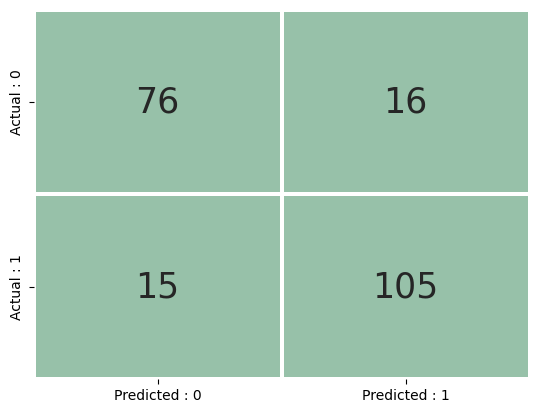

In [100]:
# plotting confusion matrix for train data

cm = confusion_matrix(ytrain,pred_train)
conf_matrix = pd.DataFrame(data = cm , columns = ['Predicted : 0','Predicted : 1'], index = ['Actual : 0','Actual : 1'])
c = ['#97C1A9']

sns.heatmap(data = conf_matrix, annot = True , cbar = False , fmt = 'd' , cmap = c , linewidth = 1.5 , 
           annot_kws = {'size' : 25})

<AxesSubplot:>

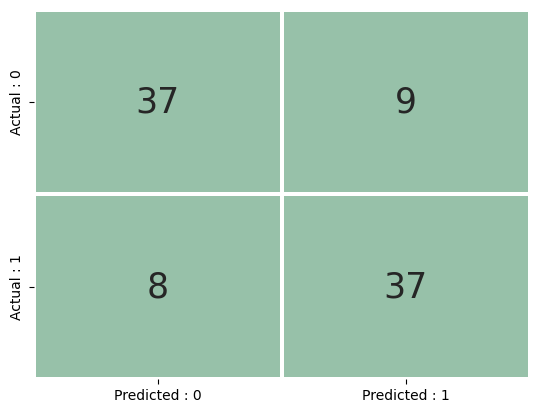

In [101]:
# plotting confusion matrix for test data

cm = confusion_matrix(ytest,pred_test)
conf_matrix = pd.DataFrame(data = cm , columns = ['Predicted : 0','Predicted : 1'], index = ['Actual : 0','Actual : 1'])
c = ['#97C1A9']

sns.heatmap(data = conf_matrix, annot = True , cbar = False , fmt = 'd' , cmap = c , linewidth = 1.5 , 
           annot_kws = {'size' : 25})

In [102]:
# Classification report

print(f'Train report : \n{classification_report(ytrain,pred_train)}\n')
print(f'Testreport : \n{classification_report(ytest,pred_test)}')

Train report : 
              precision    recall  f1-score   support

           0       0.84      0.83      0.83        92
           1       0.87      0.88      0.87       120

    accuracy                           0.85       212
   macro avg       0.85      0.85      0.85       212
weighted avg       0.85      0.85      0.85       212


Testreport : 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        46
           1       0.80      0.82      0.81        45

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



From above report we can conclude that our base model has performed good in both train and unseen data with accuracy of almost 80%. On further progress we try to improve our performance by building other models, tuning their hyperparameters and selecting columns based on feature importance score

In [103]:
odds = pd.DataFrame(np.round(np.exp(model_lr.params),2))
odds.sort_values(by = 0 , ascending=False)

,0
const,19.93
cp,2.15
slope,1.96
restecg,1.25
thalach,1.02
age,1.01
trestbps,0.99
chol,0.99
exang,0.64
fbs,0.63


In [104]:
odds.sort_values(by = 0 , ascending=False)[0:8]

# the below extracted features has the highest influence on the target variable, according to the oddds ratio 

,0
const,19.93
cp,2.15
slope,1.96
restecg,1.25
thalach,1.02
age,1.01
trestbps,0.99
chol,0.99


In [105]:
# Classification using logistic regression: 

from sklearn.linear_model import LogisticRegression

model_lr1 = LogisticRegression().fit(xtrain , ytrain)


In [106]:
# Decision Tree Model 

dt = DecisionTreeClassifier()

model_dt = dt.fit(xtrain,ytrain)


In [107]:
# Random Forest Model 

rf = RandomForestClassifier()

model_rf = rf.fit(xtrain,ytrain)

In [108]:
# XGBoost Model:

xg = XGBClassifier()

model_xg = xg.fit(xtrain, ytrain)

In [109]:
# Ada Boost Model 

ab = AdaBoostClassifier()

model_ab = ab.fit(xtrain,ytrain)

In [110]:
# Grid Search CV -- RF params 

params = ({"n_estimators" :range(100,200,25),
    "criterion" :['gini','entropy'],
    "max_depth": range(1,6,1),
    "min_samples_split" : range(1,10,2),
    "min_samples_leaf" : range(1,5,1),
    "max_features" : ['sqrt','log2']})
          
cv = GridSearchCV(estimator=rf,param_grid=params, cv = 3, n_jobs=-1, 
                 verbose=5, return_train_score="f1")
          
cv.fit(xtrain,ytrain)

cv.best_score_

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


0.8538564721663313

In [111]:
model_grid = cv.best_estimator_.fit(xtrain,ytrain)

In [112]:
# User Defined Function with remarks

from sklearn.metrics import accuracy_score , f1_score , cohen_kappa_score

performance_remarks_df = pd.DataFrame(columns = ['Name','Train_accuracy','Test_accuracy','Train_f1score',
                                        'Test_f1score','Train_Kappa','Test_Kappa','Remarks'])


def model_performance_remarks(model , name , xtrain = xtrain, xtest = xtest):
    
    global performance_remarks_df
    
    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)
    
    acc_train = round(accuracy_score(ytrain , pred_train),2)*100
    acc_test = round(accuracy_score(ytest , pred_test),2)*100
    
    f1_train = f1_score(ytrain , pred_train)
    f1_test = f1_score(ytest , pred_test)
    
    kappa_train = cohen_kappa_score(ytrain , pred_train)
    kappa_test = cohen_kappa_score(ytest , pred_test)
    
    #remarks
    
    def remark(train , test):
        
        if name == 'Base Model':
            return 'Base Model'
        
        else:
            
            if abs(train - test) > 10 or train > 95:
                        return 'Over Fit'
            elif train < 81 or test < 78:
                        return 'Under Fit'
            else:
                        return 'Good Fit'
        
    
    performance_remarks_df = performance_remarks_df.append({'Name':name ,
                                           'Train_accuracy': round(acc_train,2),
                                           'Test_accuracy': round(acc_test,2),
                                           'Train_f1score': f1_train,
                                           'Test_f1score': f1_test,
                                           'Train_Kappa': kappa_train,
                                           'Test_Kappa' : kappa_test,
                                           'Remarks' : remark(acc_train , acc_test)}, ignore_index = True)
    
    print('Train report \n',classification_report(ytrain , pred_train))
    print('Test report \n', classification_report(ytest , pred_test))


In [129]:
from sklearn.metrics import roc_curve, auc
def roc_auc_curve(name,model):
    '''
    Given a list of classifiers, this function plots the ROC curves
    
    '''       
    plt.figure(figsize=(12, 8))   
        
    for name, clf in zip(name, model):
        clf.fit(xtrain, ytrain)
        
        pred_proba = clf.predict_proba(xtest)[:, 1]
        
        fpr, tpr, thresholds = roc_curve(ytest, pred_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, lw=3, label= name +' ROC curve (area = %0.2f)' % (roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic (ROC) curves', fontsize=20)
        plt.legend(loc="lower right")

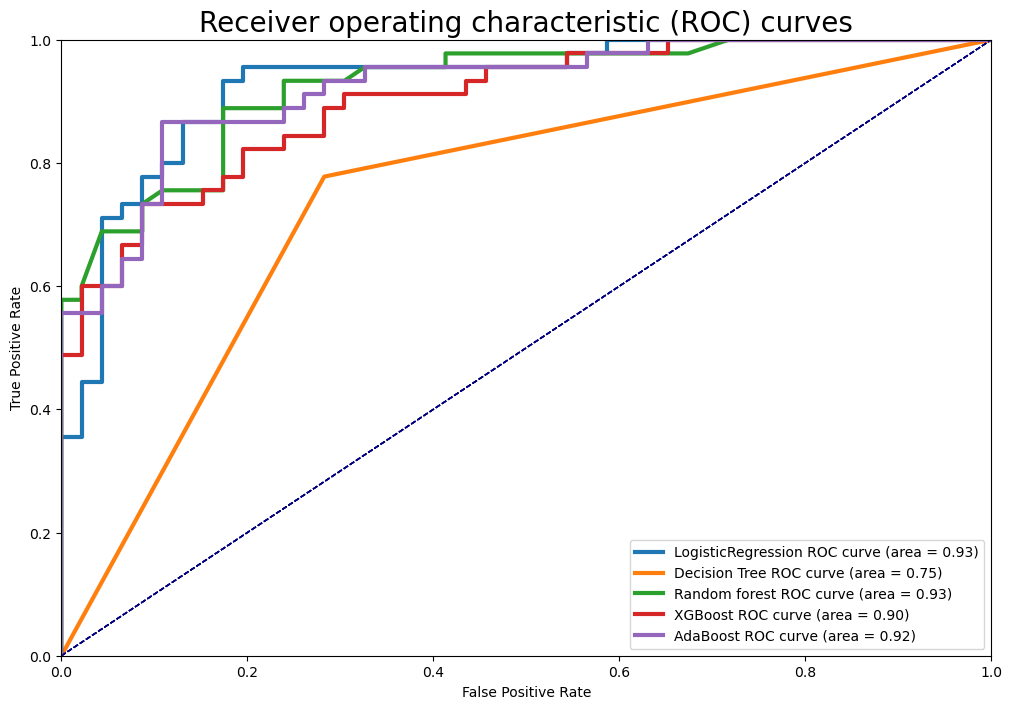

In [130]:
names=["LogisticRegression","Decision Tree","Random forest","XGBoost","AdaBoost"]
models=[model_lr1,model_dt,model_rf,model_xg,model_ab]
roc_auc_curve(names,models)

In [113]:
model_performance_remarks(model_lr1, "Logistic Regression")
model_performance_remarks(model_dt, "Decision Tree")
model_performance_remarks(model_rf, "Random forest")
model_performance_remarks(model_xg, "XGBoost")
model_performance_remarks(model_ab, "AdaBoost")
model_performance_remarks(model_grid, "Grid SearchCV")

Train report 
               precision    recall  f1-score   support

           0       0.89      0.79      0.84        92
           1       0.85      0.93      0.89       120

    accuracy                           0.87       212
   macro avg       0.87      0.86      0.86       212
weighted avg       0.87      0.87      0.87       212

Test report 
               precision    recall  f1-score   support

           0       0.93      0.80      0.86        46
           1       0.82      0.93      0.87        45

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91

Train report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00       120

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1

In [133]:
performance_remarks_df.sort_values(by='Test_accuracy' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["Train_f1score",], color='#6495ED')\
.bar(subset=["Train_Kappa"], color='#ff355d')\
.bar(subset=["Test_Kappa"], color='lightseagreen')\
.bar(subset=["Test_f1score"], color='gold')

,Name,Train_accuracy,Test_accuracy,Train_f1score,Test_f1score,Train_Kappa,Test_Kappa,Remarks
0,Logistic Regression,87.000000,87.000000,0.888000,0.875000,0.727706,0.736614,Good Fit
5,Grid SearchCV,92.000000,86.000000,0.935484,0.865979,0.844802,0.714734,Good Fit
2,Random forest,100.000000,82.000000,1.000000,0.829787,1.000000,0.648649,Over Fit
4,AdaBoost,95.000000,81.000000,0.954357,0.824742,0.894250,0.626959,Over Fit
3,XGBoost,100.000000,79.000000,1.000000,0.800000,1.000000,0.582871,Over Fit
1,Decision Tree,100.000000,77.000000,1.000000,0.778947,1.000000,0.538963,Over Fit


In [118]:
!pip install --user catboost

  Using cached catboost-1.2.7-cp39-cp39-win_amd64.whl (101.8 MB)
  Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cb = CatBoostClassifier()

model_cb = cb.fit(xtrain, ytrain)

In [ ]:
model_performance_remarks(model_cb, "CatBoost")